In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("arma.xlsx")

print(df.info())
print("\nإحصائيات وصفية:")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            84 non-null     object 
 1   Turbidity                       84 non-null     float64
 2   Temprature °C                   84 non-null     float64
 3   Delta T                         84 non-null     float64
 4   pH (6.5-8.5)                    84 non-null     float64
 5   Total Dissolved Solids  (<500)  84 non-null     float64
 6   Phosphates (PO4) <2             84 non-null     float64
 7   Nitrates as (NO3) <8.825        84 non-null     float64
 8   Dissolved Oxygen (>6)           84 non-null     float64
 9   Biological Oxygen Demand (<6)   84 non-null     float64
 10  Fecal Coliform                  84 non-null     int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 7.3+ KB
None

إحصائيات وصفية:
        Turbidity  T

In [ ]:
if 'Date' not in df.columns:
    df['Date'] = pd.date_range(start='2020-01-01', periods=len(df))

df.set_index('Date', inplace=True)

df_numeric = df.apply(pd.to_numeric, errors='coerce').dropna()

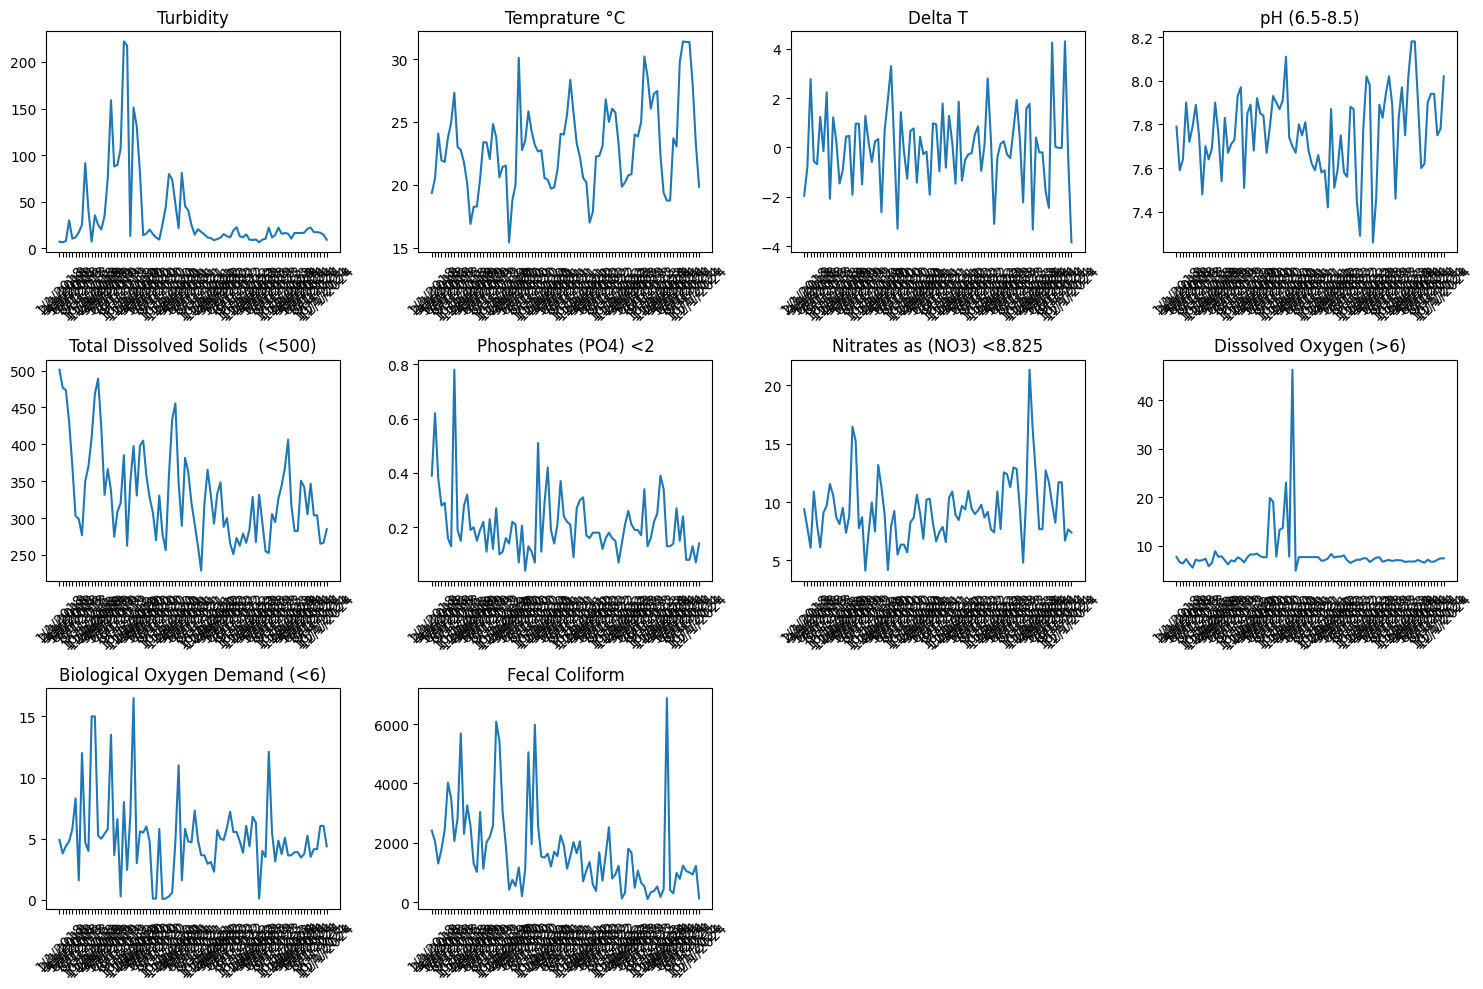

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_numeric.columns, 1):
    plt.subplot(3, 4, i)
    plt.plot(df_numeric.index, df_numeric[column])
    plt.title(column)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def test_stationarity(timeseries):
    # Dickey-Fuller Test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=[
        'Test Statistic',
        'p-value',
        'Number of Lags Used',
        'Number of Observations Used'
    ])

    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value

    print(dfoutput)

# Check stationarity for each variable
for column in df_numeric.columns:
    print(f"\nChecking stationarity for {column}")
    test_stationarity(df_numeric[column])


فحص Turbidity
نتائج اختبار استقرار السلسلة الزمنية:
اختبار الإحصائيات          -2.941880
القيمة الاحتمالية           0.040690
عدد الإبطاءات المستخدمة     5.000000
عدد المشاهدات              78.000000
القيم الحرجة (1%)          -3.517114
القيم الحرجة (5%)          -2.899375
القيم الحرجة (10%)         -2.586955
dtype: float64

فحص Temprature °C
نتائج اختبار استقرار السلسلة الزمنية:
اختبار الإحصائيات          -0.882211
القيمة الاحتمالية           0.793774
عدد الإبطاءات المستخدمة    10.000000
عدد المشاهدات              73.000000
القيم الحرجة (1%)          -3.523284
القيم الحرجة (5%)          -2.902031
القيم الحرجة (10%)         -2.588371
dtype: float64

فحص Delta T
نتائج اختبار استقرار السلسلة الزمنية:
اختبار الإحصائيات          -5.345174
القيمة الاحتمالية           0.000004
عدد الإبطاءات المستخدمة     7.000000
عدد المشاهدات              76.000000
القيم الحرجة (1%)          -3.519481
القيم الحرجة (5%)          -2.900395
القيم الحرجة (10%)         -2.587498
dtype: float64

فحص pH (6.5-8.5)

المتوسط المتحرك AR

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

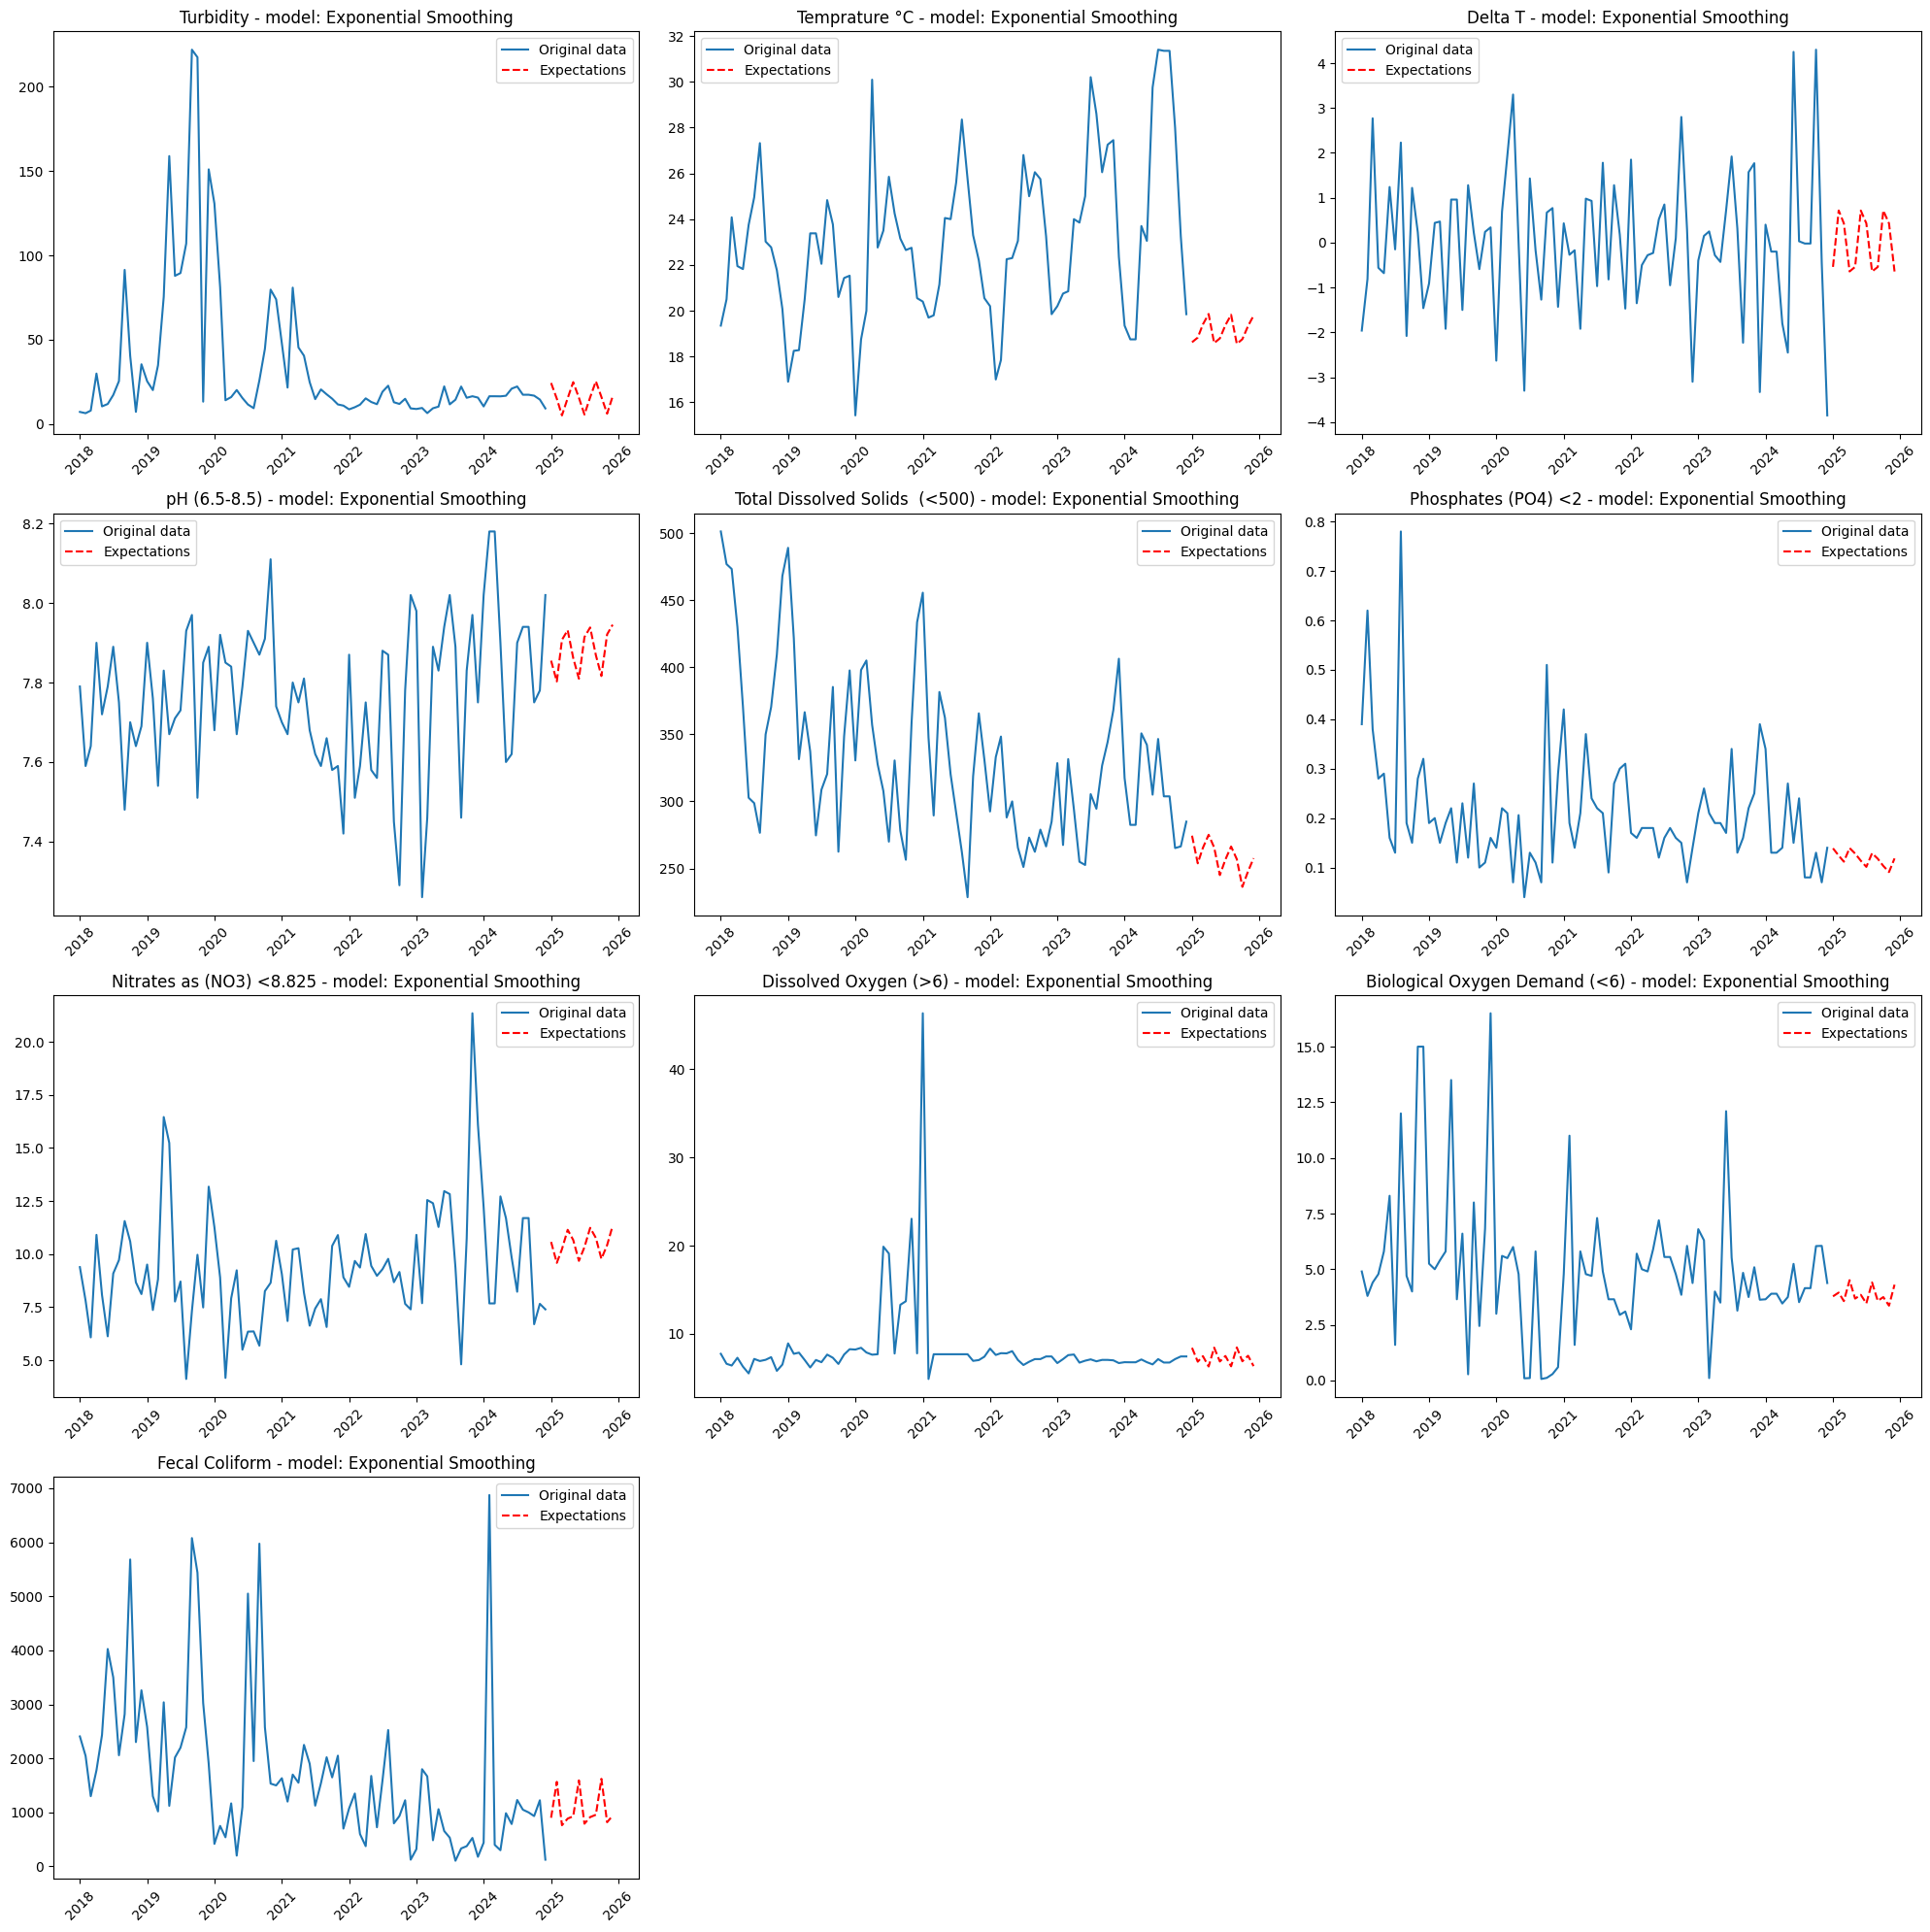

تقرير التنبؤ المتقدم

المتغير: Turbidity
--------------------
نوع النموذج: Exponential Smoothing
معلمات النموذج:
  trend: additive
  seasonal: additive
  seasonal_periods: 4

القيمة الأخيرة: 9.2900
أول قيمة متوقعة: 24.3637
التغير المتوقع: 15.0737

المتغير: Temprature °C
--------------------
نوع النموذج: Exponential Smoothing
معلمات النموذج:
  trend: additive
  seasonal: additive
  seasonal_periods: 4

القيمة الأخيرة: 19.8500
أول قيمة متوقعة: 18.6248
التغير المتوقع: -1.2252

المتغير: Delta T
--------------------
نوع النموذج: Exponential Smoothing
معلمات النموذج:
  trend: additive
  seasonal: additive
  seasonal_periods: 4

القيمة الأخيرة: -3.8500
أول قيمة متوقعة: -0.5403
التغير المتوقع: 3.3097

المتغير: pH (6.5-8.5)
--------------------
نوع النموذج: Exponential Smoothing
معلمات النموذج:
  trend: additive
  seasonal: additive
  seasonal_periods: 4

القيمة الأخيرة: 8.0200
أول قيمة متوقعة: 7.8550
التغير المتوقع: -0.1650

المتغير: Total Dissolved Solids  (<500)
--------------------
نوع النم

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def advanced_forecast_multivariate(df, forecast_steps=12):

    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)

    forecast_results = pd.DataFrame(
        index=pd.date_range(
            start=df.index[-1] + pd.offsets.MonthBegin(1),
            periods=forecast_steps,
            freq='MS'
        )
    )

    forecast_details = {}

    for column in df.columns:
        try:
            model = ExponentialSmoothing(
                df[column],
                trend='add',  
                seasonal='add',  
                seasonal_periods=4  
            )

            fit_model = model.fit()
            forecasts = fit_model.forecast(steps=forecast_steps)

            forecast_results[column] = forecasts

            forecast_details[column] = {
                'model_type': 'Exponential Smoothing',
                'parameters': {
                    'trend': 'additive',
                    'seasonal': 'additive',
                    'seasonal_periods': 4
                }
            }

        except Exception as e:
            print(f"خطأ في التنبؤ لـ {column}: {e}")

            try:
                ma = df[column].rolling(window=3).mean()

                last_ma = ma.iloc[-1]

                trend = (ma.iloc[-1] - ma.iloc[0]) / len(ma)

                forecasts = [last_ma]
                for _ in range(forecast_steps - 1):
                    next_value = forecasts[-1] + trend
                    forecasts.append(next_value)

                forecast_results[column] = forecasts

                forecast_details[column] = {
                    'model_type': 'Moving Average',
                    'parameters': {
                        'window': 3,
                        'trend_calculation': 'linear'
                    }
                }

            except Exception as e:
                print(f"خطأ في التنبؤ البديل لـ {column}: {e}")

    return forecast_results, forecast_details

def visualization_and_analysis(original_df, forecast_df, forecast_details):

    n_columns = len(forecast_df.columns)

    n_rows = (n_columns + 2) // 3  

    plt.figure(figsize=(20, 5 * n_rows))

    for i, column in enumerate(forecast_df.columns, 1):
        plt.subplot(n_rows, 3, i)

        plt.plot(original_df.index, original_df[column], label='Original data')

        plt.plot(forecast_df.index, forecast_df[column], label='Expectations', linestyle='--', color='red')

        plt.title(f'{column} - model: {forecast_details[column]["model_type"]}')
        plt.legend()
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    report = "تقرير التنبؤ المتقدم\n"
    report += "=" * 30 + "\n\n"

    for column in forecast_df.columns:
        report += f"المتغير: {column}\n"
        report += "-" * 20 + "\n"

        model_type = forecast_details[column]['model_type']
        report += f"نوع النموذج: {model_type}\n"

        report += "معلمات النموذج:\n"
        for param, value in forecast_details[column]['parameters'].items():
            report += f"  {param}: {value}\n"

        last_original = original_df[column].iloc[-1]
        first_forecast = forecast_df[column].iloc[0]

        report += f"\nالقيمة الأخيرة: {last_original:.4f}\n"
        report += f"أول قيمة متوقعة: {first_forecast:.4f}\n"
        report += f"التغير المتوقع: {first_forecast - last_original:.4f}\n\n"

    return report

df = pd.read_excel("arma.xlsx")

if 'Date' not in df.columns:
    df['Date'] = pd.date_range(start='2020-01-01', periods=len(df))

df.set_index('Date', inplace=True)

df_numeric = df.apply(pd.to_numeric, errors='coerce').dropna()

forecast_results, forecast_details = advanced_forecast_multivariate(df_numeric)

report = visualization_and_analysis(df_numeric, forecast_results, forecast_details)

print(report)

forecast_results.to_excel('comprehensive_forecast.xlsx')
print("تم حفظ التوقعات في 'comprehensive_forecast.xlsx'")

def create_forecast_summary(forecast_results):

    summary = "ملخص التوقعات\n"
    summary += "=" * 20 + "\n\n"

    for column in forecast_results.columns:
        summary += f"{column}:\n"
        summary += "  التوقعات: " + ", ".join([f"{val:.4f}" for val in forecast_results[column]]) + "\n"
        summary += f"  المتوسط: {forecast_results[column].mean():.4f}\n"
        summary += f"  الحد الأدنى: {forecast_results[column].min():.4f}\n"
        summary += f"  الحد الأقصى: {forecast_results[column].max():.4f}\n\n"

    return summary

print(create_forecast_summary(forecast_results))